In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [47]:
df = pd.read_csv("pastry_inventory.csv")
df.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


# Initial Data Inspection

In [32]:
#Get an idea of the data
df.shape

(307, 7)

In [33]:
#Get an idea of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [34]:
#Get descriptive statistics on the dataset
df.describe()

,sales_outlet_id,product_id,start_of_day,quantity_sold,waste
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,5.394137,70.983713,24.058632,9.296417,14.657980
std,2.049477,1.417582,12.063414,5.440115,11.202108
min,3.000000,69.000000,18.000000,0.000000,0.000000
25%,3.000000,70.000000,18.000000,6.000000,8.000000
50%,5.000000,71.000000,18.000000,8.000000,11.000000
75%,8.000000,72.000000,18.000000,11.000000,15.000000
max,8.000000,73.000000,48.000000,32.000000,47.000000


In [35]:
#check data for missing values
#a 0 denotes no missing values
df.isnull().sum()

sales_outlet_id     0
transaction_date    0
product_id          0
start_of_day        0
quantity_sold       0
waste               0
% waste             0
dtype: int64

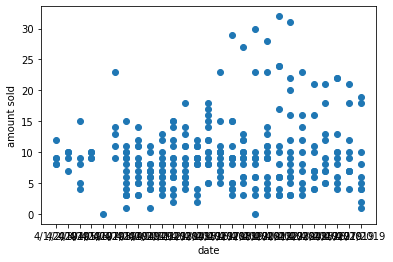

In [36]:
#plot data just to see
%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(df.transaction_date,df.quantity_sold)

# Preprocessing

In [41]:
#encode dates + add columns for enumerating days of the week
def encode_dates(df):
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    df["transaction_weekday"] = pd.to_datetime(df['transaction_date'], format = '%m/%d/%Y').dt.dayofweek
    df["transaction_day"] = pd.to_datetime(df['transaction_date'], format = '%m/%d/%Y').dt.day_name()
    
    return df

In [42]:
def preprocess_inputs(df):
    df = df.copy()
    
    #drop unnecessary columns
    df = df.drop(['% waste'], axis=1)
    
    #encode dates
    encode_dates(df)
    
    return df

In [43]:
data = preprocess_inputs(df)

In [44]:
data

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,transaction_weekday,transaction_day
0,3,2019-04-01,69,18,8,10,0,Monday
1,3,2019-04-01,70,18,12,6,0,Monday
2,3,2019-04-01,71,18,8,10,0,Monday
3,3,2019-04-01,72,48,9,39,0,Monday
4,3,2019-04-01,73,18,9,9,0,Monday
...,...,...,...,...,...,...,...,...
302,8,2019-04-27,69,18,1,17,5,Saturday
303,8,2019-04-27,70,18,4,14,5,Saturday
304,8,2019-04-27,71,18,2,16,5,Saturday
305,8,2019-04-27,72,48,19,29,5,Saturday


# Data Inspection II

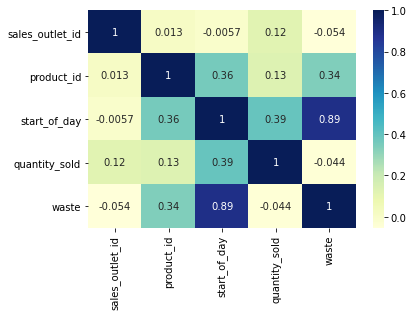

In [45]:
#generates a heat map of how data is related
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [46]:
#get an idea of sales trends for total items sold each day
df_trend = df.groupby('transaction_date').sum()['quantity_sold'].reset_index()
df_trend

,transaction_date,quantity_sold
0,4/1/2019,46
1,4/10/2019,110
2,4/11/2019,127
3,4/12/2019,133
4,4/13/2019,123
5,4/14/2019,167
6,4/15/2019,149
7,4/16/2019,144
8,4/17/2019,149
9,4/18/2019,117


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

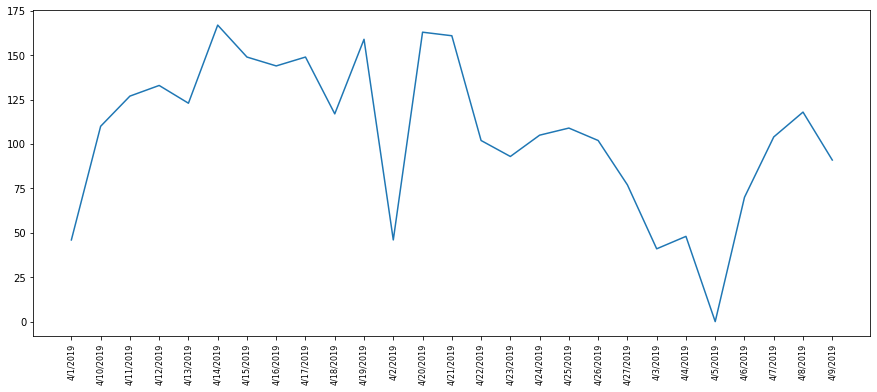

In [49]:
#graph the trend
#would like to know exactly why this doesn't show every single day in the period
plt.figure(figsize=(15,6))
plt.plot(df_trend['transaction_date'], df_trend['quantity_sold'])
plt.xticks(rotation='vertical', size=8)

In [50]:
#discovery of top selling products
prod_sales = pd.DataFrame(df.groupby('product_id').sum()['quantity_sold'])

In [51]:
#discovery of top selling products
#72 - ginger scones
#71 - chocolate croissant
#69 - Hazelnut Biscotti
#70 - Cranberry Scone
#73 - Almond Croissant
prod_sales.sort_values('quantity_sold', ascending=False)

,quantity_sold
product_id,
72,840
71,519
69,513
70,502
73,480


# Create and fit model

In [54]:
#trying to split data into indepnedent and dependent varables
X = data[['quantity_sold','transaction_weekday']]
y = data['start_of_day']

In [55]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [56]:
#model
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [57]:
model.coef_

array([0.80051041, 0.02826079])

In [59]:
model.predict(X)

array([22.26929468, 25.47133632, 22.26929468, 23.06980509, 23.06980509,
       21.49704506, 23.89857629, 23.89857629, 23.89857629, 23.09806588,
       22.32581627, 19.92428504, 19.12377463, 23.12632668, 27.92938914,
       23.95509788, 23.15458747, 23.95509788, 23.95509788, 23.15458747,
       15.97825457, 27.21366111, 24.81212988, 26.4131507 , 34.4182548 ,
       23.21110906, 20.83783862, 18.43630739, 18.43630739, 24.84039067,
       18.43630739, 25.47133632, 24.67082591, 27.07235714, 22.26929468,
       20.66827386, 19.09551383, 21.49704506, 22.29755547, 20.69653465,
       19.92428504, 21.52530586, 23.92683709, 21.52530586, 20.72479545,
       20.75305624, 19.15203542, 25.5561187 , 22.35407706, 18.35152501,
       24.78386909, 20.78131703, 19.98080662, 23.18284827, 20.78131703,
       23.21110906, 18.4080466 , 23.21110906, 22.41059865, 24.81212988,
       22.43885944, 22.43885944, 25.64090108, 22.43885944, 23.23936985,
       21.46878427, 23.8703155 , 23.8703155 , 23.8703155 , 23.06